In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

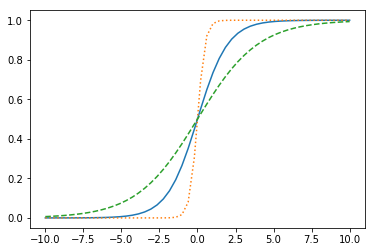

In [42]:
def sigmoid_f(x, a=1):
    return 1.0 / (1.0 + np.exp(-a*x))

x = np.linspace(-10,10)
plt.plot(x, sigmoid_f(x))
plt.plot(x, sigmoid_f(x, 4), linestyle=':')
plt.plot(x, sigmoid_f(x, 0.5), linestyle='--')

In [43]:
from sklearn.datasets import load_iris
iris = datasets.load_iris() 
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [44]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11                 4.8               3.4                1.6               0.2   
12                 4.8               3.0                1.4               0.1   
13                 4.3               3.0                1.1               0.1   
14                 5.8               4.0                1.2               0.2   
15                 5.7               4.4                1.5               0.4   
16                 5.4               3.9                1.3               0.4   
17                 5.1               3.5                1.4               0.3   
18                 5.7               3.8                1.7               0.3   
19                 5.1               3.8                1.5               0.3   
20                 5.4               3.4                1.7               0.2   
21                 5.1               3.7                1.5               0.4   
22                 4.6               3.6                1.0               0.2   
23                 5.1               3.3                1.7               0.5   
24                 4.8               3.4                1.9               0.2   
25                 5.0               3.0                1.6               0.2   
26                 5.0               3.4                1.6               0.4   
27                 5.2               3.5                1.5               0.2   
28                 5.2               3.4                1.4               0.2   
29                 4.7               3.2                1.6               0.2   
..                 ...               ...                ...               ...   
120                6.9               3.2                5.7               2.3   
121                5.6               2.8                4.9               2.0   
122                7.7               2.8                6.7               2.0   
123                6.3               2.7                4.9               1.8   
124                6.7               3.3                5.7               2.1   
125                7.2               3.2                6.0               1.8   
126                6.2               2.8                4.8               1.8   
127                6.1               3.0                4.9               1.8   
128                6.4               2.8                5.6               2.1   
129                7.2               3.0                5.8               1.6   
130                7.4               2.8                6.1               1.9   
131                7.9               3.8                6.4               2.0   
132                6.4               2.8                5.6               2.2   
133                6.3               2.8                5.1               1.5   
134                6.1               2.6                5.6               1.4   
135                7.7               3.0                6.1               2.3   
136                6.3               3.4                5.6               2.4   
137                6.4              

In [45]:
iris_sv = iris_df[iris_df['target'].isin([0, 1])]

Text(0,0.5,'petal length (cm)')

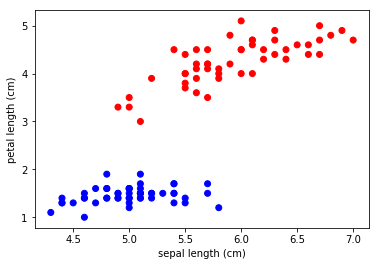

In [46]:
x0 = 'sepal length (cm)'
x1 = 'petal length (cm)'
fig, ax = plt.subplots()
ax.scatter(iris_sv[x0], iris_sv[x1], c = ['r' if c else 'b' for c in iris_sv['target']])
ax.set_xlabel(x0)
ax.set_ylabel(x1)

In [47]:
X = iris_sv[[x0, x1]]
y = iris_sv['target']
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X,y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
reg.coef_

array([[-1.4082779,  2.9856694]])

In [49]:
reg.intercept_

array([-0.54867646])

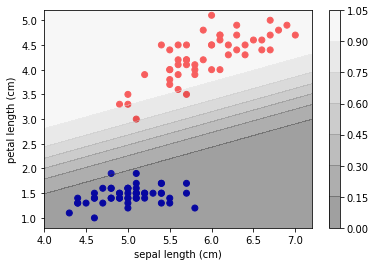

In [50]:
def sk_fit_logistic(x0, x1, reg):
    x = np.array([x0, x1])
    w = np.dot(x, reg.coef_[0]) + reg.intercept_
    return 1.0 / (1.0 + np.exp(-w))[0]

x0_range = np.linspace(4,7.2)
x1_range = np.linspace(0.8,5.2)
x0m, x1m = np.meshgrid(x0_range, x1_range)

vfunc = np.vectorize(sk_fit_logistic)

fig, ax = plt.subplots()
ax.scatter(iris_sv[x0], iris_sv[x1], c = ['r' if c else 'b' for c in iris_sv['target']])
img = ax.contourf(x0m, x1m, vfunc(x0m, x1m, reg), alpha=0.4, cmap=plt.cm.gray)
ax.set_xlabel(x0)
ax.set_ylabel(x1)
fig.colorbar(img)

In [58]:
from functools import partial

def sigmoid_2d(x0, x1, p):
    f = lambda w: 1.0 / (1.0 + np.exp(w))
    x = np.array([x0, x1])
    w = np.dot(x, [p[0], p[1]]) + p[2]
    return f(w)

def likelihood(param, X, y):
    res = 0
    for i in range(X.shape[0]):
        s = sigmoid_2d(*X.iloc[i], param)
        res -= y[i] * np.log(s) + (1-y[i])*np.log(1-s)
    return res

my_likelihood = partial(likelihood, X=X, y=y)

In [59]:
from scipy.optimize import minimize
res = minimize(my_likelihood, x0=(0,0,0), method='Nelder-Mead')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


In [60]:
res.x

array([  7.7191245 , -17.03775056,   3.84098033])

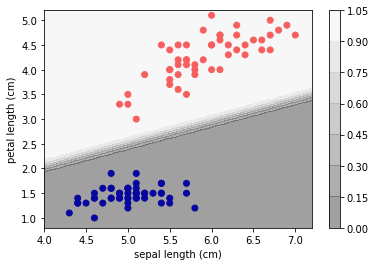

In [61]:
vfunc = np.vectorize(partial(sigmoid_2d, p=res.x))
fig, ax = plt.subplots()
ax.scatter(iris_sv[x0], iris_sv[x1], c = ['r' if c else 'b' for c in iris_sv['target']])
img = ax.contourf(x0m, x1m, vfunc(x0m, x1m), alpha=0.4, cmap=plt.cm.gray)
ax.set_xlabel(x0)
ax.set_ylabel(x1)
fig.colorbar(img)